**24-Stunden-Seismogramm (Heliplot)**

Mit diesem Jupyter-Notebook kannst Du Dir ein 24-Stunden-Seismogramm für einen RaspberryShake anschauen.

In [1]:
# @title
# Diesen Code solltest Du nicht verändern, ausser wenn Du schon etwas programmieren kannst:

import warnings
warnings.filterwarnings("ignore")
try:
    import obspy
except:
    !pip install obspy | grep -v 'already satisfied'

from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime, Stream, Trace, Stats
import matplotlib.pyplot as plt

 Wähle einen Tag und einen RaspberryShake aus.

Beispiel:

**day = obspy.UTCDateTime("2024-04-03T00:00:00.000Z"**

**rs_station = ["KSSO","RFE6B", "MOUTI"])**

In [2]:
# Diesen Parameter kannst Du ändern:

day = obspy.UTCDateTime("2024-04-03T00:00:00.000Z")

# 3D RaspberryShake Schul-Seismometer in der deutschsprachigen Schweiz:
#rs_station = ["KSSO","RFE6B", "MOUTI"]     # KS Solothurn
#rs_station = ["MNGRZ","R7DBB", "ZUR"]      # MNG Rämibühl
rs_station = ["KSZUG","R3BE0", "ZUR"]      # KS Zug
#rs_station = ["KSCHR","RB22F", "PLONS"]    # Bündner KS Chur
#rs_station = ["KSRYC","RF726", "WILA"]     # KS Rychenberg Winterthur
#rs_station = ["KSKNZ","RC23B", "ZUR"]      # KS Küsnacht
#rs_station = ["KSHOZ","RE5E7", "ZUR"]      # KS Hottingen Zürich
#rs_station = ["KSURI","R8F49", "MUO"]      # KS Uri
#rs_station = ["KSROM","R58D2", "WALHA"]    # KS Romanshorn
#rs_station = ["KSZOW","RF726", "WILA"]     # KS Zürcher Oberland, Wetzikon
#rs_station = ["GUSTZ","R4335", "ZUR"]      # Gymnasium Unterstrass
#rs_station = ["GOBZL","R19BB", "BALST"]    # Gymnasium Oberaargau
#rs_station = ["GLSTL","RDFB5", "MUTEZ"]    # Gymnasium Liestal
#rs_station = ["GBIEL","R8C09"]             # OFFLINE Gymnasium Biel-Seeland Biel
#rs_station = ["KSENZ","RD3C4"]             # OFFLINE Kantonsschule Enge Zürich
#rs_station = ["KSOBW","RDFB5"]             # OFFLINE Gymnasium Oberwil

# ==========================================================
# 1D RaspberryShake in der Romandie:
#rs_station = ["ESNYM","R5D35"]  # OFFLINE ES Nyon-Marens
#rs_station = ["EPSBE","R65E9"]  # OFFLINE EPS de Begnins – L'Esplanade
#rs_station = ["ESLAS","R8E4D"]  # OFFLINE ES de La Sarraz et environs
#rs_station = ["EPSGD","R3B57"]  # EPS Grandson -- NO DATA?
#rs_station = ["ESTSE","R52F7"]  # OFFLINE ES des Trois-Sapins
#rs_station = ["ESPEC","R46E5"]  # OFFLINE ES du Pays-d'Enhaut
#rs_station = ["EPSOL","RE4DE"]  # OFFLINE EPS Les Ormonts-Leysin
#rs_station = ["EPSVP","RF727"]  # OFFLINE EPSCL Collège du Verney
#rs_station = ["EPSLE","R5BF0"]  # OFFLINE Collège/EPS de l'Elysée
#rs_station = ["EPSLB","R0CD2"]  # OFFLINE EPS Bergières
#rs_station = ["EDILA","RC676"]  # partner institution (EDI LAUSANNE)
#rs_station = ["CLREN","R3BDC"]  # OFFLINE Collège du Léman
#rs_station = ["EPSEC","R8710"]  # OFFLINE EPS Ecublens
#rs_station = ["ESSTI","R1F5E"]  # OFFLINE ES St-Imier
#rs_station = ["COPCM","RA83F"]  # OFFLINE CO des Perraires
#rs_station = ["EAMCX","S7A06"]  # Ecole de l'Arpille
#rs_station = ["COORS","S3900"]  # CO Orsières
#rs_station = ["COLEY","RA7C7"]  # CO Leytron
#rs_station = ["COHEU","RB289"]  # CO Hérens -- NO DATA?
#rs_station = ["COAVI","RA652"]  # CO d'Anniviers
#rs_station = ["COLSL","RE4EF"]  # OFFLINE CO des Liddes
#rs_station = ["COAYT","RB15C"]  # CO Ayent -- NO DATA?
#rs_station = ["COSAV","R2D50"]  # CO Savièse -- NO DATA?
#rs_station = ["COSTG","R7694"]  # CO St-Guérin
#rs_station = ["CPPSS","R05D6"]  # partner institution (SION CPPS HES-SO)

Führe nun den Code in der nächsten Zelle aus, um das 24-Stunden Seismogramm für den RaspberryShake für verschiedene Frequenzbänder darzustellen.

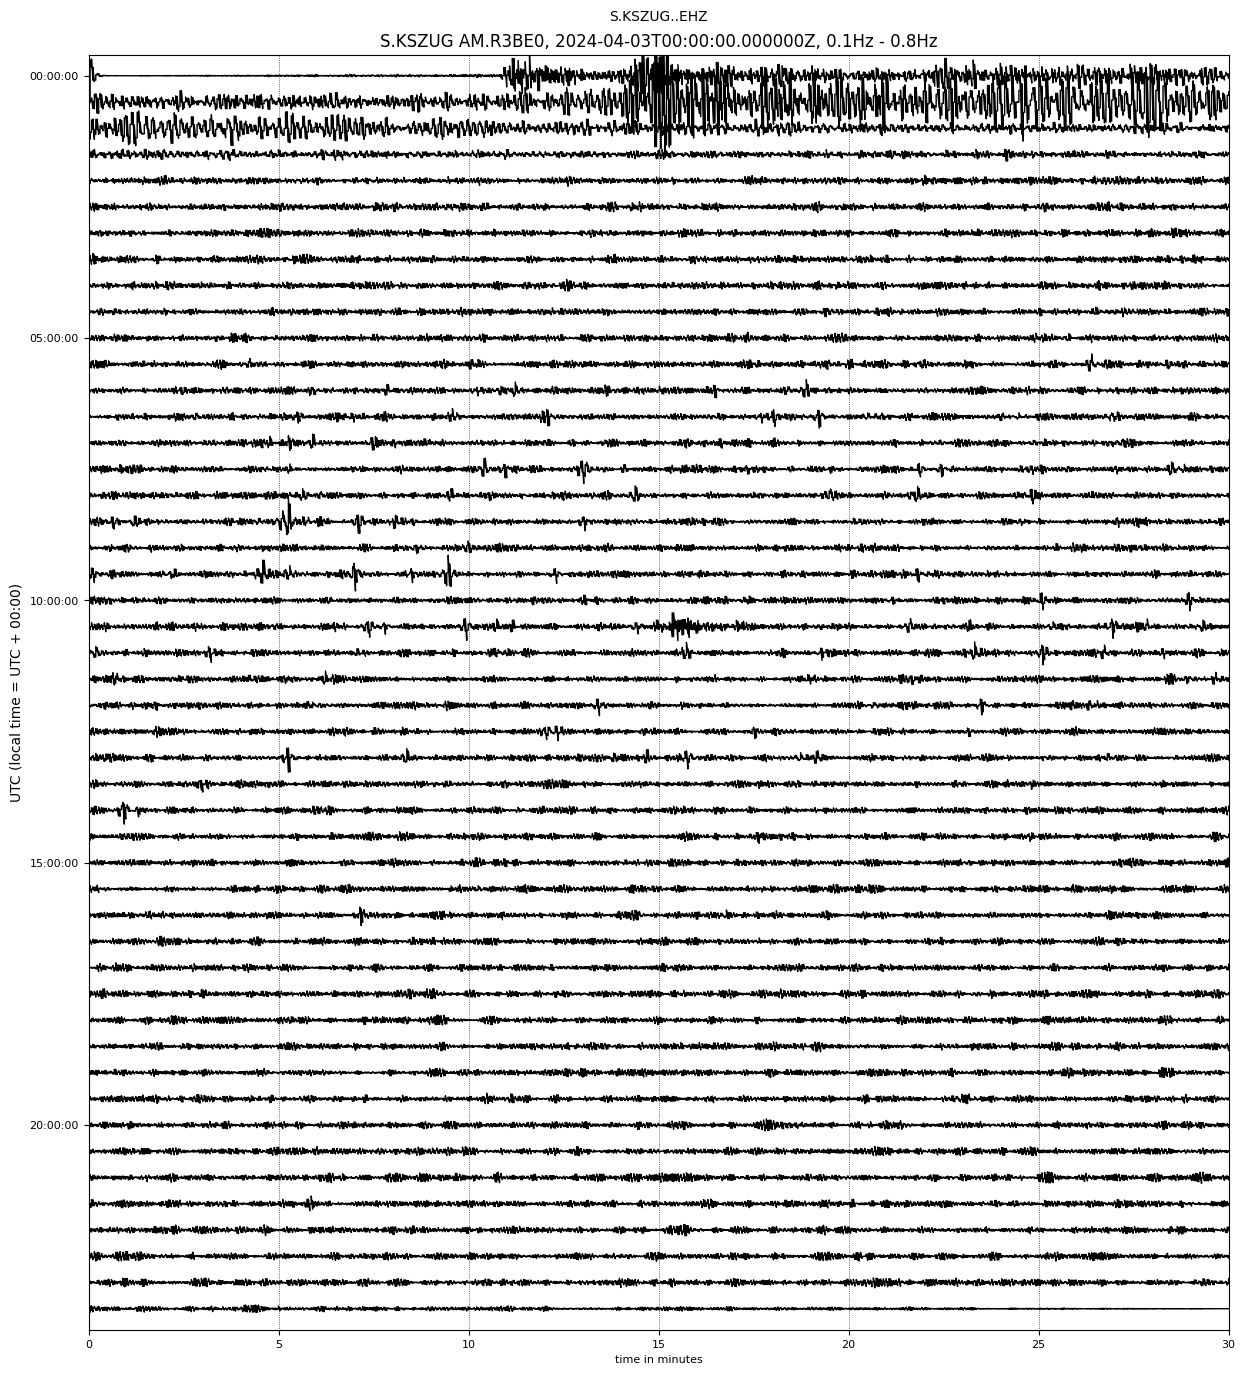

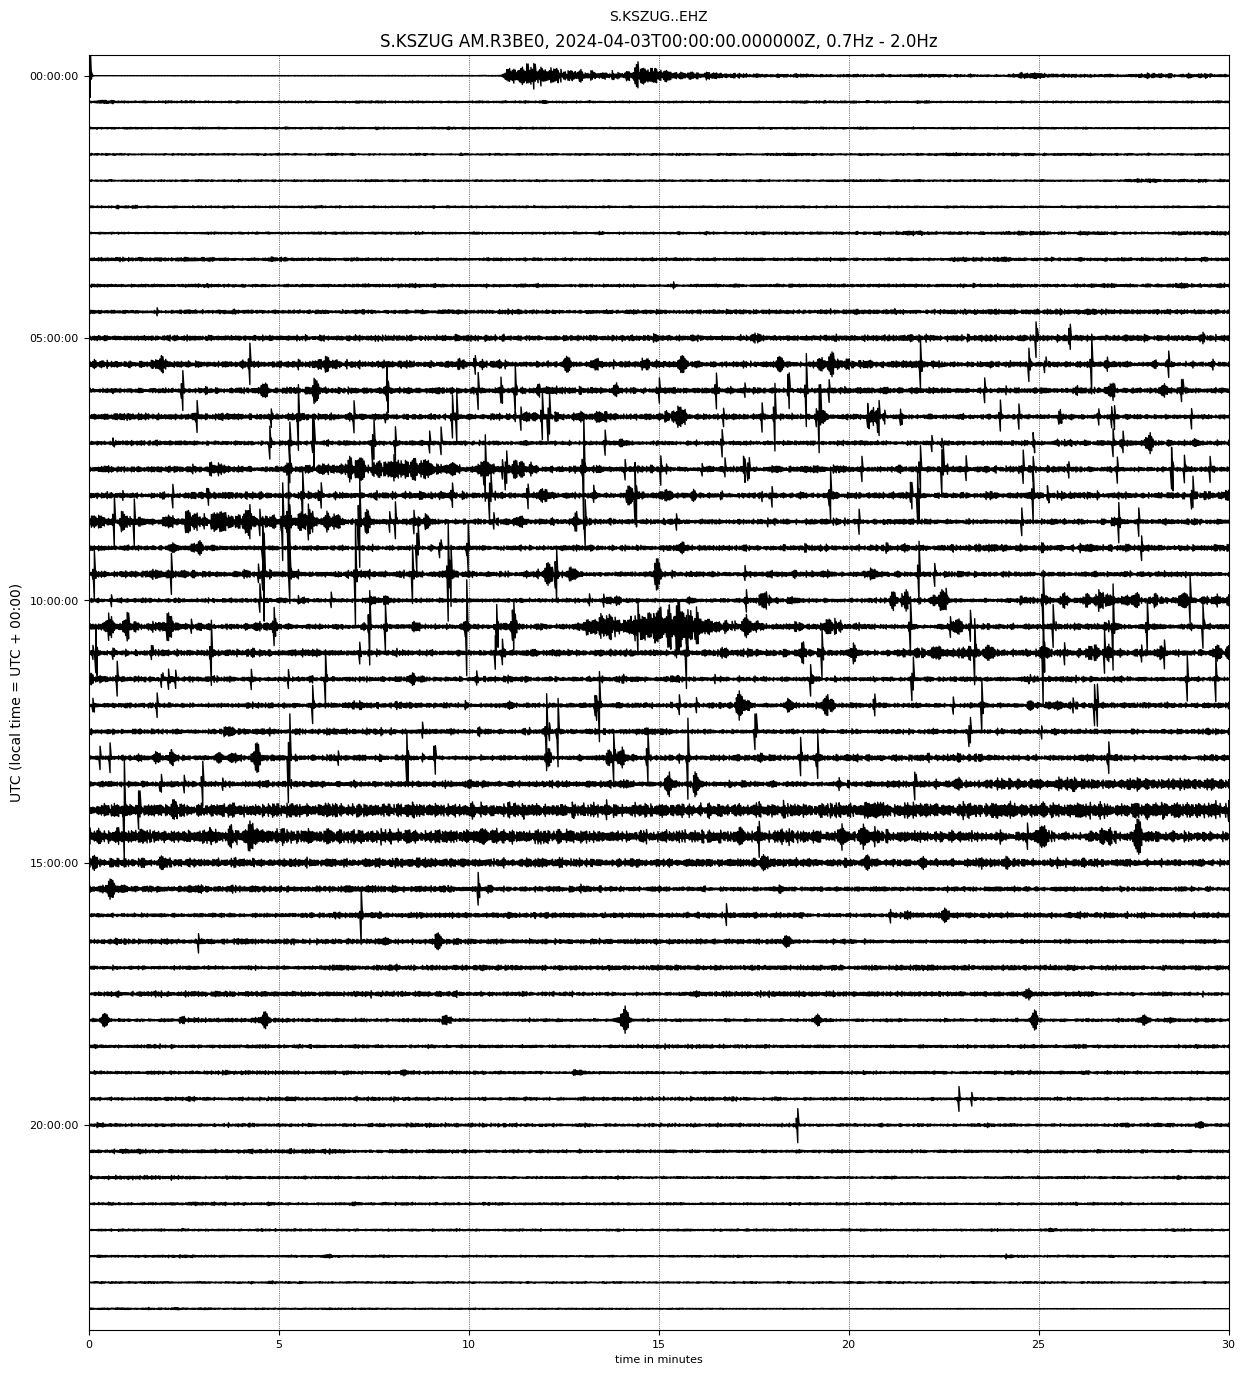

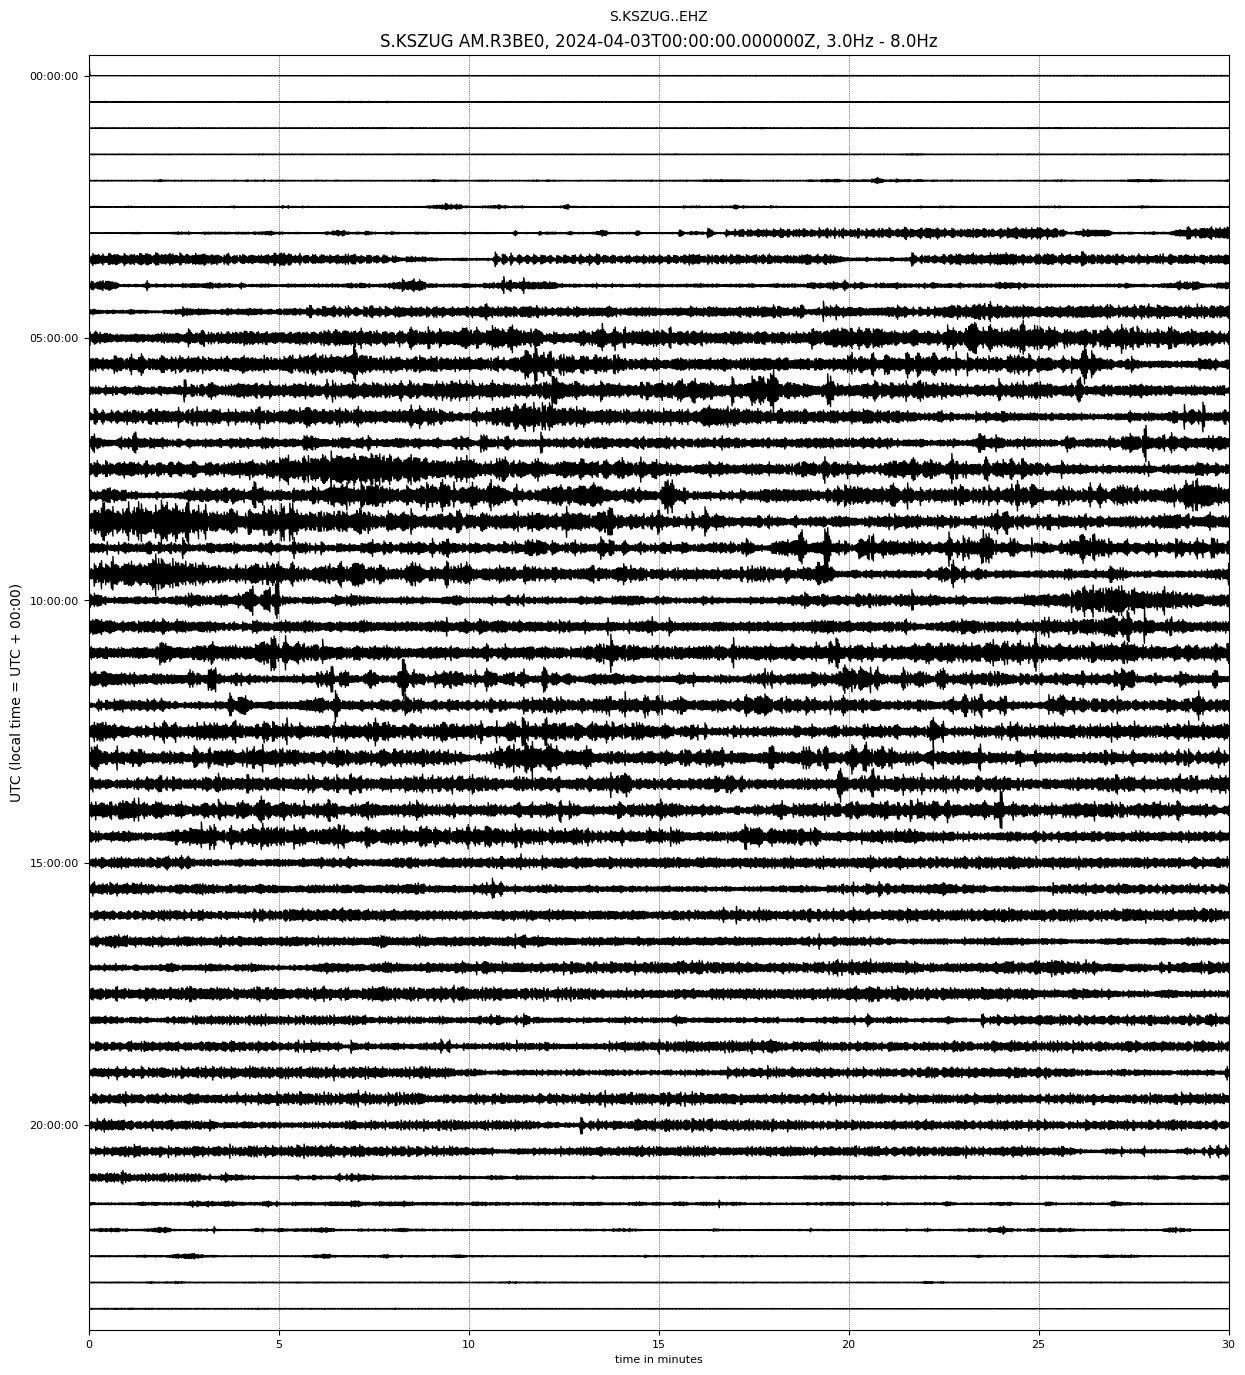

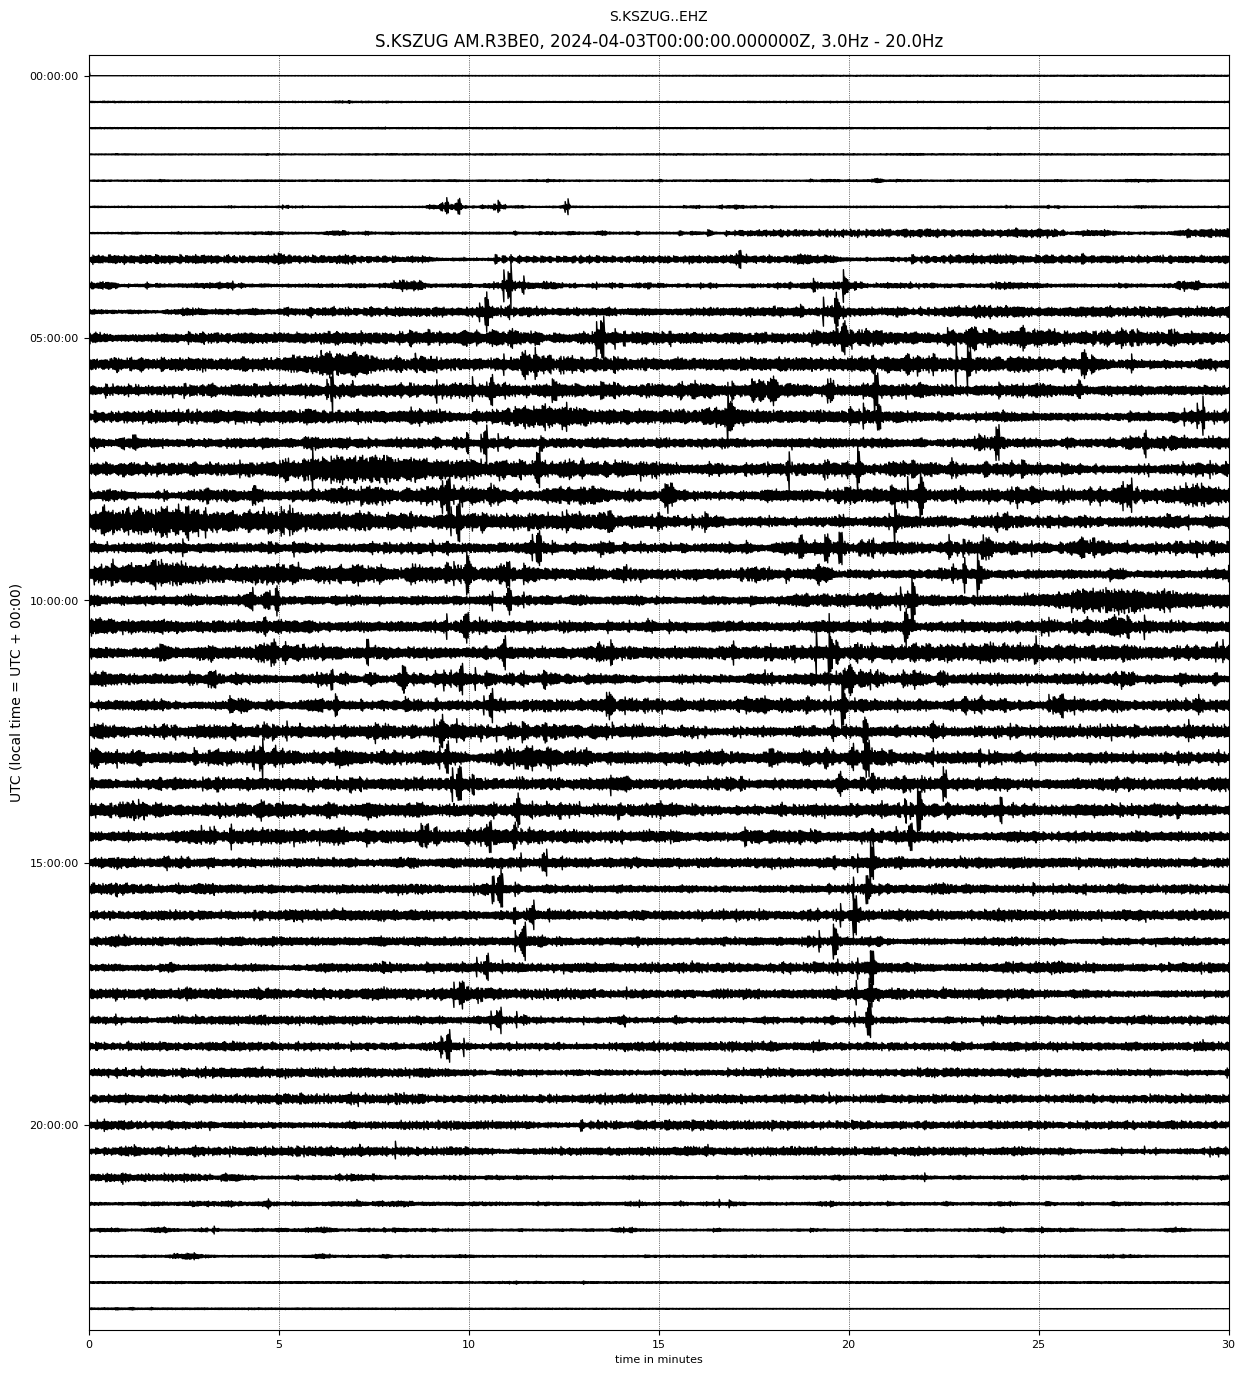

In [3]:
# @title
# Diesen Code solltest Du nicht verändern, ausser wenn Du schon etwas programmieren kannst:

freqmin = [0.1, 0.7, 3.0, 3.0]
freqmax = [0.8, 2.0, 8.0, 20.0]

try:
  singlechannel = Client("ETH").get_waveforms(network="S", station=rs_station[0],
                                              location="--", channel="EHZ", starttime=day, endtime=day + 24*60*60, attach_response=True)
  #singlechannel = Client("ETH").get_waveforms(network="CH", station=rs_station[0],
  #                                            location="--", channel="HHZ", starttime=start_day, endtime=day + 24*60*60, attach_response=True)
except:
  singlechannel = Client("RASPISHAKE").get_waveforms(network="AM", station=rs_station[1],
                                                     location="00", channel="EHZ", starttime=day, endtime=day + 24*60*60, attach_response=True)
singlechannel.merge(method=0, fill_value='interpolate')
singlechannel.detrend()
singlechannel.remove_response(output='VEL')

for idx, f_min in enumerate(freqmin):
  singlechannel_copy = singlechannel.copy()
  singlechannel_copy.filter('bandpass',freqmin=freqmin[idx], freqmax=freqmax[idx], corners=4, zerophase=True)
  fig = plt.figure()
  singlechannel_copy[0].plot(type='dayplot', interval=30, color='k',fig=fig)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  plt.title("S." + str(rs_station[0]) + " AM." + str(rs_station[1]) + ", " + str(day) + ", " + str(freqmin[idx])+"Hz - " + str(freqmax[idx])+"Hz")